### 구글 드라이브 연동 및 데이터 다운로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 사용할 헤더

In [2]:
## Tutorial
import os
import glob
import json
import pprint

import numpy as np

from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

## PE-Miner
import pickle
# import  peminer
import seaborn as sns
# from overload import overload

## Ember
# import  ember
#import pandas as pd
import  pandas as  pd
from  tqdm.notebook import  tqdm
from  sklearn import  tree
from  sklearn.metrics import  precision_score
from  sklearn.metrics import  recall_score
from  sklearn.metrics import  f1_score
from  sklearn.metrics import  plot_confusion_matrix
from  sklearn.metrics import  confusion_matrix
from  sklearn.model_selection import  GridSearchCV
import  matplotlib.pyplot as  plt
from sklearn.feature_extraction import FeatureHasher

# from  pprint import  pprint

%matplotlib inline

### 학습 알고리즘 및 사용할 함수

In [3]:
# 고정 시드값
SEED = 41

# 학습 알고리즘 선택 함수
def load_model(**kwargs):
    if kwargs["model"] == "rf":
        return RandomForestClassifier(random_state=kwargs["random_state"], n_jobs=4)
    elif kwargs["model"] == "dt":
        return DecisionTreeClassifier(random_state=kwargs["random_state"])
    elif kwargs["model"] == "lgb":
        return LGBMClassifier(random_state=kwargs["random_state"])
    elif kwargs["model"] == "svm":
        return SVC(random_state=kwargs["random_state"])
    elif kwargs["model"] == "lr":
        return LogisticRegression(random_state=kwargs["random_state"], n_jobs=-1)
    elif kwargs["model"] == "knn":
        return KNeighborsClassifier(n_jobs=-1)
    elif kwargs["model"] == "adaboost":
        return AdaBoostClassifier(random_state=kwargs["random_state"])
    elif kwargs["model"] == "mlp":
        return MLPClassifier(random_state=kwargs["random_state"])
    else:
        print("Unsupported Algorithm")
        return None

In [4]:
# 피클 파일 로드
def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

# 피클 파일 저장
def save_pickle(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)

### 데이터 로드



> #### PEMINER



> ##### 데이터 로드

In [25]:
# PEMINER 에서 사용한 특징의 이름
peminer_header = ['ADVAP132.DLL', 'AWFAXP32.DLL', 'AWFXAB32.DLL', 'AWPWD32.DLL', 'AWRESX32.DLL', 'AWUTIL32.DLL', 'BHNETB.DLL', 'BHSUPP.DLL', 'CCAPI.DLL', 'CCEI.DLL', 'CCPSH.DLL', 'CCTN20.DLL', 'CMC.DLL', 'COMCTL32.DLL', 'COMDLG32.DLL', 'CRTDLL.DLL', 'DCIMAN.DLL', 'DCIMAN32.DLL', 'DSKMAINT.DLL', 'FileHeader.Characteristics', 'FileHeader.Machine', 'FileHeader.NumberOfSections', 'FileHeader.NumberOfSymbols', 'FileHeader.PointerToSymbolTable', 'FileHeader.SizeOfOptionalHeader', 'FileHeader.TimeDateStamp', 'GDI32.DLL', 'GROUP.DLL', 'HYPERTERM.DLL', 'KERNL32.DLL', 'LZ32.DLL', 'MAPI.DLL', 'MAPI32.DLL', 'MFC30.DLL', 'MPR.DLL', 'MSFS32.DLL', 'MSNDUI.DLL', 'MSNET32.DLL', 'MSPST32.DLL', 'MSSHRUI.DLL', 'MSVIEWUT.DLL', 'NAL.DLL', 'NDIS30.DLL', 'NETAPI.DLL', 'NETAPI32.DLL', 'NETBIOS.DLL', 'NETDI.DLL', 'NETSETUP.DLL', 'NWAB32.DLL', 'NWNET32.DLL', 'NWNP32.DLL', 'OLEDLG.DLL', 'OptionalHeader.AddressOfEntryPoint', 'OptionalHeader.BaseOfCode', 'OptionalHeader.BaseOfData', 'OptionalHeader.CheckSum', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.VirtualAddress', 'OptionalHeader.DllCharacteristics', 'OptionalHeader.FileAlignment', 'OptionalHeader.ImageBase', 'OptionalHeader.LoaderFlags', 'OptionalHeader.Magic', 'OptionalHeader.MajorImageVersion', 'OptionalHeader.MajorLinkerVersion', 'OptionalHeader.MajorOperatingSystemVersion', 'OptionalHeader.MajorSubsystemVersion', 'OptionalHeader.MinorImageVersion', 'OptionalHeader.MinorLinkerVersion', 'OptionalHeader.MinorOperatingSystemVersion', 'OptionalHeader.MinorSubsystemVersion', 'OptionalHeader.NumberOfRvaAndSizes', 'OptionalHeader.Reserved1', 'OptionalHeader.SectionAlignment', 'OptionalHeader.SizeOfCode', 'OptionalHeader.SizeOfHeaders', 'OptionalHeader.SizeOfHeapCommit', 'OptionalHeader.SizeOfHeapReserve', 'OptionalHeader.SizeOfImage', 'OptionalHeader.SizeOfInitializedData', 'OptionalHeader.SizeOfStackCommit', 'OptionalHeader.SizeOfStackReserve', 'OptionalHeader.SizeOfUninitializedData', 'OptionalHeader.Subsystem', 'POWERCFG.DLL', 'RASAPI16.DLL', 'RASAPI32.DLL', 'RASPI.DLL', 'RPCLTC1.DLL', 'RPCNS4.DLL', 'RPCRT4.DLL', 'RPCTLC3.DLL', 'RPCTLC5.DLL', 'RPCTLC6.DLL', 'RPCTLS3.DLL', 'RPCTLS5.DLL', 'RPCTLS6.DLL', 'RSRC32.DLL', 'Resource.Characteristics', 'Resource.MajorVersion', 'Resource.MinorVersion', 'Resource.NumberOfIdEntries', 'Resource.NumberOfNamedEntries', 'Resource.RT_ACCELERATOR', 'Resource.RT_BITMAP', 'Resource.RT_CURSOR', 'Resource.RT_DIALOG', 'Resource.RT_DLGINCLUDE', 'Resource.RT_FONT', 'Resource.RT_FONTDIR', 'Resource.RT_GROUP_CURSOR', 'Resource.RT_GROUP_ICON', 'Resource.RT_ICON', 'Resource.RT_MENU', 'Resource.RT_MESSAGETABLE', 'Resource.RT_RCDATA', 'Resource.RT_STRING', 'Resource.RT_VERSION', 'Resource.TimeDateStamp', 'SAPNSP.DLL', 'SECUR32.DLL', 'SHELL32.DLL', 'SHLWAPI.DLL', 'SLENH.DLL', 'Section.data.Characteristics', 'Section.data.NumberOfLinenumbers', 'Section.data.NumberOfRelocations', 'Section.data.PointerToLinenumbers', 'Section.data.PointerToRawData', 'Section.data.PointerToRelocations', 'Section.data.SizeOfRawData', 'Section.data.VirtualAddress', 'Section.data.VirtualSize', 'Section.rsrc.Characteristics', 'Section.rsrc.NumberOfLinenumbers', 'Section.rsrc.NumberOfRelocations', 'Section.rsrc.PointerToLinenumbers', 'Section.rsrc.PointerToRawData', 'Section.rsrc.PointerToRelocations', 'Section.rsrc.SizeOfRawData', 'Section.rsrc.VirtualAddress', 'Section.rsrc.VirtualSize', 'Section.text.Characteristics', 'Section.text.NumberOfLinenumbers', 'Section.text.NumberOfRelocations', 'Section.text.PointerToLinenumbers', 'Section.text.PointerToRawData', 'Section.text.PointerToRelocations', 'Section.text.SizeOfRawData', 'Section.text.VirtualAddress', 'Section.text.VirtualSize', 'UMDM32.DLL', 'USER32.DLL', 'VERSION.DLL', 'WININET.DLL', 'WINMM.DLL', 'WINREG.DLL', 'WINSOCK.DLL', 'WS2.DLL', 'WSOCK32.DLL']
print(len(peminer_header))

188


In [6]:
drive_path = '/content/drive/'
fname_train = np.load(os.path.join(drive_path, "My Drive", "new_peminer_train_fnames.npy"))
X_train = pd.DataFrame(np.load(os.path.join(drive_path, "My Drive", "new_peminer_train_features.npy")), columns=peminer_header)
y_train = np.load(os.path.join(drive_path, "My Drive", "new_peminer_train_labels.npy"))

fname_test = np.load(os.path.join(drive_path, "My Drive", "new_peminer_test_fnames.npy"))
X_test = pd.DataFrame(np.load(os.path.join(drive_path, "My Drive", "new_peminer_test_features.npy")), columns=peminer_header)
y_test = np.load(os.path.join(drive_path, "My Drive", "new_peminer_test_labels.npy"))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20000, 188)
(20000,)
(20000, 188)
(20000,)


> ##### 학습

In [7]:
import hashlib
import pprint

def train(X_train, y_train, model="rf"):
    print(X_train.shape)

    # 학습 알고리즘 불러오기
    # 랜덤 포레스트 : rf
    # 의사결정 트리 : dt
    # lightgbm : lgb
    # svm : svm
    # logistic regression : lr
    # knn : knn
    # adaboost : adaboost
    # mlp : mlp
    clf = load_model(model=model, random_state=SEED)
    # 학습
    clf.fit(X_train, y_train)
    return clf


def evaluate(clf, X_test, y_test):
    # 예측
    predict = clf.predict(X_test)

    # 성능 확인
    print("accuracy", clf.score(X_test, y_test))
    print("precision", precision_score(y_test, predict))
    print("recall", recall_score(y_test, predict))
    print("f1-score", f1_score(y_test, predict))
    
    # 틀린파일
    wrongs = list(zip(X_test[y_test != predict], y_test[y_test != predict]))
    return wrongs


clf = train(X_train, y_train, model="rf")
_ = evaluate(clf, X_test, y_test)

(20000, 188)
accuracy 0.9542
precision 0.9713419674841555
recall 0.9657534246575342
f1-score 0.9685396345651877


> ##### 특징 중요도 그래프

ADVAP132.DLL                                                                  0.000000
Resource.RT_GROUP_CURSOR                                                      0.000000
Resource.RT_GROUP_ICON                                                        0.000000
Resource.RT_ICON                                                              0.000000
Resource.RT_MENU                                                              0.000000
                                                                                ...   
OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.VirtualAddress    0.039508
FileHeader.Characteristics                                                    0.042138
OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.Size                0.047621
OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.Size              0.055340
OptionalHeader.ImageBase                                                      0.065310
Length: 188, dtype: float64
107
['OptionalH

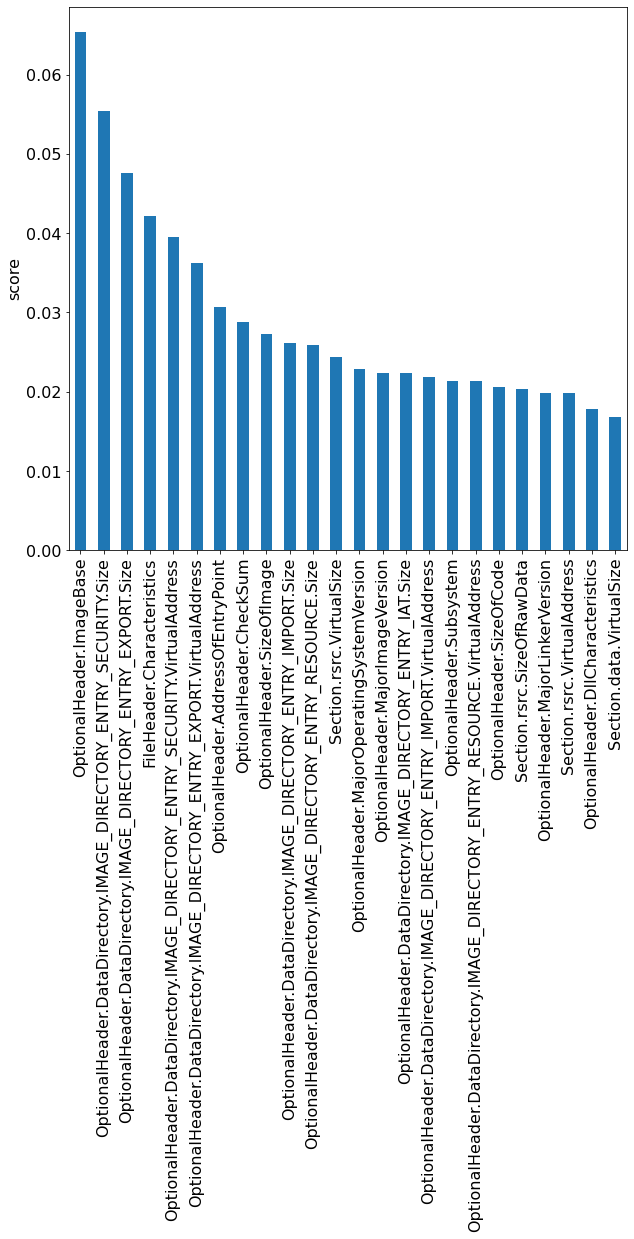

In [24]:
def draw_feature_importance_plot():
    plt.figure(figsize=(10, 10))
    feat_importances = pd.Series(clf.feature_importances_, index=peminer_header)
    print(feat_importances.sort_values())     # 값 출력
    pd.set_option('display.max_column', 500)  # 항목 전체 출력하려고
    feat_importances.nlargest(24).plot(kind='bar')

    feat_importances_nozero = {}
    for i in range(0,188):
      if feat_importances.values[i] != 0:
        feat_importances_nozero[feat_importances.index[i]] = feat_importances.values[i]
    feat = []
    print(len(feat_importances_nozero))
    for i in range(0, 180):
      feat.append(sorted(feat_importances.items(), key=lambda x: x[1], reverse=True)[i][0])
    print(feat)

    plt.ylabel("score", fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.savefig("peminer importance")

draw_feature_importance_plot()



> #### EMBER



> ##### 데이터 로드

In [8]:
drive_path = '/content/drive/'
X_train = read_pickle(os.path.join(drive_path, "My Drive", "ember_train_features.pkl"))
y_train = read_pickle(os.path.join(drive_path, "My Drive", "ember_train_labels.pkl"))

X_test = read_pickle(os.path.join(drive_path, "My Drive", "ember_test_features.pkl"))
y_test = read_pickle(os.path.join(drive_path, "My Drive", "ember_test_labels.pkl"))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20000, 2381)
(20000,)
(20000, 2381)
(20000,)


> ##### 학습

In [9]:
clf = load_model(model="lgb", random_state=SEED)
clf.fit(X_train, y_train)

predict = clf.predict(X_test)

print("accuracy", clf.score(X_test, y_test))
print("precision", precision_score(y_test, predict))
print("recall", recall_score(y_test, predict))
print("f1-score", f1_score(y_test, predict))

accuracy 0.95505
precision 0.9739190591490834
recall 0.9642465753424657
f1-score 0.9690586818103596


> ##### 특징 중요도 그래프

Imports(Function) 709          0
Imports(DLL) 168               0
Imports(DLL) 167               0
Imports(DLL) 166               0
Imports(DLL) 165               0
Imports(DLL) 164               0
Imports(DLL) 163               0
Imports(DLL) 162               0
Imports(DLL) 161               0
Imports(DLL) 160               0
Imports(DLL) 159               0
Imports(DLL) 158               0
Imports(DLL) 157               0
Imports(DLL) 156               0
Imports(DLL) 155               0
Imports(DLL) 154               0
Imports(DLL) 153               0
Imports(DLL) 152               0
Imports(DLL) 151               0
Imports(DLL) 150               0
Imports(DLL) 149               0
Imports(DLL) 148               0
Imports(DLL) 169               0
Imports(DLL) 170               0
Imports(DLL) 171               0
Imports(DLL) 172               0
Imports(DLL) 194               0
Imports(DLL) 193               0
Imports(DLL) 192               0
Imports(DLL) 191               0
Imports(DL

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

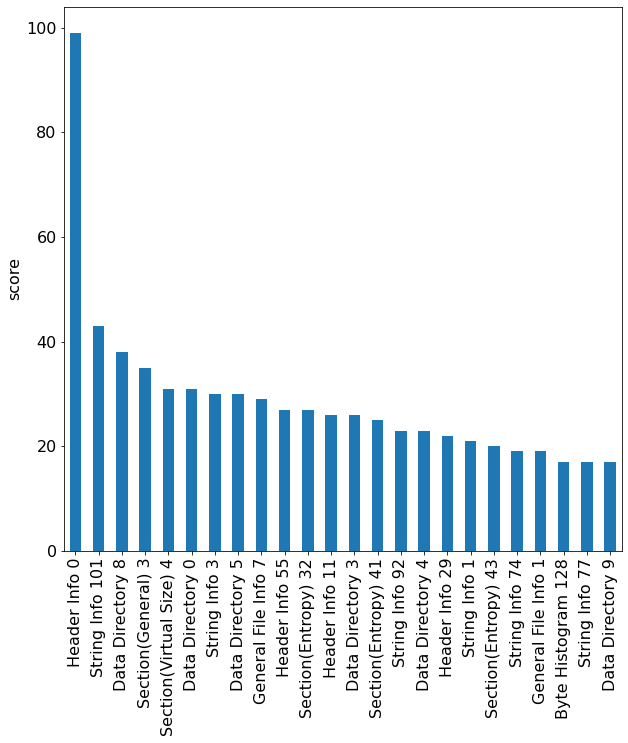

In [11]:
section, dll, function, eat = 50, 256, 1024, 128    

header = [f"Byte Histogram {i}" for i in range(256)] +\
[f"Byte Entropy Histogram {i}" for i in range(256)] +\
[f"String Info {i}" for i in range(104)]+\
[f"General File Info {i}" for i in range(10)]+\
[f"Header Info {i}" for i in range(62)]+\
[f"Section(General) {i}" for i in range(5)]+\
[f"Section(Size) {i}" for i in range(section)]+\
[f"Section(Entropy) {i}" for i in range(section)]+\
[f"Section(Virtual Size) {i}" for i in range(section)]+\
[f"Section(Entry) {i}" for i in range(section)]+\
[f"Section(Characteristic) {i}" for i in range(section)]+\
[f"Imports(DLL) {i}" for i in range(dll)]+\
[f"Imports(Function) {i}" for i in range(function)]+\
[f"Exports(Function) {i}" for i in range(eat)]+\
[f"Data Directory {i}" for i in range(30)]


plt.figure(figsize=(10, 10))
feat_importances = pd.Series(clf.feature_importances_, index=header)
feat_importances.nlargest(24).plot(kind='bar')
print(feat_importances.sort_values())     # 값 출력
pd.set_option('display.max_row', 2391)  # 항목 전체 출력하려고
feat_importances_nozero = {}
for i in range(0,2381):
  if feat_importances.values[i] != 0:
    feat_importances_nozero[feat_importances.index[i]] = feat_importances.values[i]

print(len(feat_importances_nozero))

feat = []
for i in range(0, 40):
  feat.append(sorted(feat_importances_nozero.items(), key=lambda x: x[1], reverse=True)[i][0])
print(feat)
plt.ylabel("score", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)